In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import warnings
warnings.simplefilter("ignore")

# EmazeMeGroups

In [2]:
groups = pd.read_csv('data/EmazeMeGroups.csv')

In [3]:
groups.head()

,GroupID,GroupName,Admin,Privecy,Visibility,priority,varified,AssociatedGroupsJson,ModeratorsJson,DateCreated,DateUpdated,AboutGroup,EmazeSite,GroupCoverUrl,GroupPhotoUrl,SiteThumnail
0,1,BeitarJerusalem,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,0,0,NaN,NaN,2020-04-05 10:27:38.0531290,2020-04-05 10:27:38.0531290,Group of Beitar players,https://emaze.me/diogoverdasca,//userscontent2.emaze.com/userinfo//cover/2dc9...,//userscontent2.emaze.com/userinfo//image/7c4d...,//storage.googleapis.com/userscontent2.emaze.c...
1,2,BeitarFans,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,0,0,NaN,NaN,2020-04-05 10:27:38.0531290,2020-04-05 10:27:38.0531290,Group for fans of Beitar Jerusalem f.c.,NaN,//userscontent2.emaze.com/userinfo//cover/b397...,//userscontent2.emaze.com/userinfo//image/1e5a...,NaN
2,3,newgroupwithdate2,NaN,0,0,0,0,NaN,NaN,2020-04-05 12:00:36.2022096,2020-04-05 12:00:36.2022096,NaN,NaN,NaN,NaN,NaN
3,4,another-group,NaN,0,0,0,0,NaN,NaN,2020-04-20 08:57:01.8046276,2020-04-20 08:57:01.8046276,NaN,NaN,NaN,NaN,NaN
4,5,"""""",NaN,0,0,0,0,NaN,NaN,2020-04-20 10:44:39.2241056,2020-04-20 10:44:39.2241056,NaN,NaN,NaN,NaN,NaN


### Removing Unecessary Columns + Rename

In [4]:
columns_to_drop = ['GroupCoverUrl','GroupPhotoUrl','SiteThumnail','AssociatedGroupsJson','ModeratorsJson','priority','varified']
groups = groups.drop(columns_to_drop, axis=1)
groups.head()

,GroupID,GroupName,Admin,Privecy,Visibility,DateCreated,DateUpdated,AboutGroup,EmazeSite
0,1,BeitarJerusalem,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,2020-04-05 10:27:38.0531290,2020-04-05 10:27:38.0531290,Group of Beitar players,https://emaze.me/diogoverdasca
1,2,BeitarFans,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,2020-04-05 10:27:38.0531290,2020-04-05 10:27:38.0531290,Group for fans of Beitar Jerusalem f.c.,NaN
2,3,newgroupwithdate2,NaN,0,0,2020-04-05 12:00:36.2022096,2020-04-05 12:00:36.2022096,NaN,NaN
3,4,another-group,NaN,0,0,2020-04-20 08:57:01.8046276,2020-04-20 08:57:01.8046276,NaN,NaN
4,5,"""""",NaN,0,0,2020-04-20 10:44:39.2241056,2020-04-20 10:44:39.2241056,NaN,NaN


In [5]:
groups.rename(columns={'Privecy': 'Privacy'}, inplace=True)

### DataTypes

In [6]:
groups.dtypes

GroupID         int64
GroupName      object
Admin          object
Privacy         int64
Visibility      int64
DateCreated    object
DateUpdated    object
AboutGroup     object
EmazeSite      object
dtype: object

In [7]:
#changed date types to datatime
groups.DateCreated = pd.to_datetime(groups['DateCreated'])
groups.DateUpdated = pd.to_datetime(groups['DateUpdated'])

### Privacy

In [8]:
#most groups have: anyone can join without asking permission
groups['Privacy'].value_counts()

0    34
1     3
2     1
Name: Privacy, dtype: int64

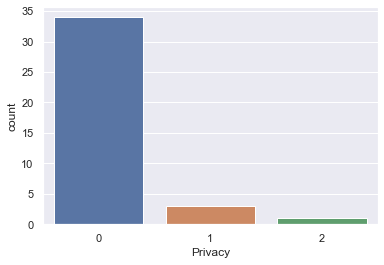

In [9]:
#most groups are public: anyone can join without asking permission
ax = sns.countplot(x='Privacy', data=groups)
ax

### Distribution of Visibilities

In [10]:
#all groups are visible: everyone can see the group and follow it
groups['Visibility'].value_counts()

0    38
Name: Visibility, dtype: int64

### Number of Groups

In [11]:
#there are currently 38 groups
len(groups['GroupName'].unique())

38

### Which Groups Have Admins

In [12]:
#filter out rows with nan as admin
admin_groups = groups.dropna(subset=['Admin'])
admin_groups.head()

,GroupID,GroupName,Admin,Privacy,Visibility,DateCreated,DateUpdated,AboutGroup,EmazeSite
0,1,BeitarJerusalem,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,2020-04-05 10:27:38.053129000,2020-04-05 10:27:38.053129000,Group of Beitar players,https://emaze.me/diogoverdasca
1,2,BeitarFans,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,2020-04-05 10:27:38.053129000,2020-04-05 10:27:38.053129000,Group for fans of Beitar Jerusalem f.c.,NaN
6,7,test111,db2995b1-3963-4631-b702-65d02fca3b81,0,0,2020-04-20 11:46:05.091843400,2020-04-20 11:46:05.091843400,NaN,NaN
8,9,asdasd,db2995b1-3963-4631-b702-65d02fca3b81,0,0,2020-04-20 13:21:25.927537000,2020-04-20 13:21:25.927537000,NaN,NaN
9,10,asdasda,db2995b1-3963-4631-b702-65d02fca3b81,0,0,2020-04-20 13:31:33.022503600,2020-04-20 13:31:33.022503600,NaN,NaN


In [13]:
#most groups have an admin
admin_groups['Admin'].count()

33

### Which Groups have an About

In [14]:
#filter out groups with nan as AboutGroup
about_groups = groups.dropna(subset=['AboutGroup'])
about_groups.head()

,GroupID,GroupName,Admin,Privacy,Visibility,DateCreated,DateUpdated,AboutGroup,EmazeSite
0,1,BeitarJerusalem,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,2020-04-05 10:27:38.053129000,2020-04-05 10:27:38.053129000,Group of Beitar players,https://emaze.me/diogoverdasca
1,2,BeitarFans,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,2020-04-05 10:27:38.053129000,2020-04-05 10:27:38.053129000,Group for fans of Beitar Jerusalem f.c.,NaN
14,15,Israeli Singers,886b35c1-7e9d-46da-b9ff-d4099d142194,0,0,2020-05-31 08:23:51.706593500,2020-05-31 08:23:51.706593500,This is a unique group of Israeli singers. Isr...,NaN
15,16,Israeli Actors & Actresses,886b35c1-7e9d-46da-b9ff-d4099d142194,0,0,2020-05-31 09:08:05.030662800,2020-05-31 09:08:05.030662800,Welcome to Israeli Actors & Actresses Group! H...,NaN
16,17,Israeli Models,886b35c1-7e9d-46da-b9ff-d4099d142194,0,0,2020-05-31 09:13:44.671635700,2020-05-31 09:13:44.671635700,"Whatever the reason, Israel is producing hot n...",NaN


In [15]:
#14 groups have an 'about'
about_groups['AboutGroup'].count()

14

# EmazeMeGroupFollowers

In [16]:
followers = pd.read_csv('data/EmazeMeGroupFollowers.csv')
followers.head()

,FollowId,FollowerId,EmazeMeGroupId,FollowingSince
0,3,240238a0-ce99-4ea7-ac77-eff09fb5eff2,1,0001-01-03 00:00:00.000
1,4,240238a0-ce99-4ea7-ac77-eff09fb5eff2,2,0001-01-03 00:00:00.000
2,5,e9477dec-c960-4f11-a563-9781cf8b1c15,1,0001-01-03 00:00:00.000
3,6,e9477dec-c960-4f11-a563-9781cf8b1c15,2,0001-01-03 00:00:00.000
4,7,93aff917-ec28-4201-b1d2-788e275671b2,1,0001-01-03 00:00:00.000


### How Many Followers are there in Total?

In [17]:
#61 followers
len(followers['FollowerId'].unique())

62

### Groups with Followers

In [18]:
#GroupID 26 has most follows
followers['EmazeMeGroupId'].value_counts()

26    43
2     18
1     17
13    10
15     8
14     5
38     1
37     1
32     1
31     1
30     1
Name: EmazeMeGroupId, dtype: int64

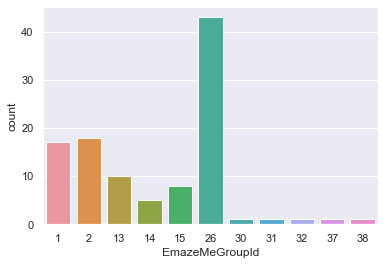

In [19]:
ax1 = sns.countplot(x='EmazeMeGroupId', data=followers)
ax1

In [20]:
#Group with most amount of followers is: Soccer Players(25 is just the index)
groups[groups.GroupID == 26]['GroupName']

25    Soccer Players
Name: GroupName, dtype: object